<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_20_Crear_y_evaluar_un_perceptron_Scikit_learn_Tarjeta_de_cr%C3%A9dito_edad_ahorro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Emular el trabajo de un perceptrón



# Fundamento teórico

## ¿Qué es un perceptrón?


Un perceptrón es un algoritmo de aprendizaje supervisado de tipo clasificación binaria que intenta separar linealmente dos clases de datos. Fue desarrollado por Frank Rosenblatt en 1957 y es considerado el precursor de las redes neuronales artificiales más complejas que existen hoy en día.

Matemáticamente, un perceptrón toma un vector de entrada $𝑥$ y produce una salida binaria  $𝑦$.

El proceso de cálculo en un perceptrón implica multiplicar cada elemento del vector de entrada por un peso correspondiente, sumar estos productos, y luego aplicar una función de activación para producir la salida. La función de activación típica es la función escalón, que devuelve 1 si la suma es mayor o igual a cero y 0 en otro caso.

El perceptrón puede aprender los pesos adecuados a través de un proceso iterativo de ajuste durante el entrenamiento. Esto se logra mediante la comparación de la salida predicha con la salida real y la actualización de los pesos en función de la diferencia entre ellas.

Aunque el perceptrón es un modelo simple y puede utilizarse para problemas de clasificación linealmente separables, su capacidad se amplió enormemente con el desarrollo de redes neuronales más profundas y complejas que utilizan múltiples capas y funciones de activación no lineales.

## ¿Cómo se entrena un perceptrón?

El entrenamiento de un perceptrón de forma matemática. El perceptrón es un algoritmo de aprendizaje supervisado que se utiliza para clasificación binaria. En su forma más simple, puede representarse matemáticamente de la siguiente manera:

Ejemplo, se tiene un conjunto de datos de entrenamiento con $n$ características (o atributos) $(x_1, x_2, ..., x_n)$ y una etiqueta de clase $(y)$ que puede ser $0$ o $1$.

Cada dato de entrenamiento se representa como un vector $(x = [x_1, x_2, ..., x_n])$ y el perceptrón tiene un vector de pesos $(w = [w_1, w_2, ..., w_n])$ y un sesgo (bias) $(b)$.

La salida $(z)$ del perceptrón se calcula como la suma ponderada de las características más el sesgo:

$$
z = \sum_{i=1}^{n} w_i \cdot x_i + b
$$


Y la salida del perceptrón (la predicción) se calcula aplicando una función de activación escalón (step function) que produce $1$ si $(z)$ es mayor o igual a cero y $0$ en otro caso:


$$
\hat{y} = \begin{cases} 1, & \text{si } z \geq 0 \\ 0, & \text{en otro caso} \end{cases}
$$

Durante el entrenamiento, el perceptrón ajusta los pesos y el sesgo para minimizar la función de pérdida, que en el caso del perceptrón puede ser la suma de errores cuadrados (SSE, por sus siglas en inglés):

$$
E = \frac{1}{2} \sum_{i} (y_i - \hat{y}_i)^2 $$

El objetivo del entrenamiento es encontrar los pesos y el sesgo que minimizan esta función de pérdida. Esto se hace típicamente utilizando el algoritmo de descenso de gradiente, donde los pesos y el sesgo se actualizan en cada iteración del siguiente modo:

$$
w_i = w_i + \alpha \cdot (y - \hat{y}) \cdot x_i
$$

$$
b = b + \alpha \cdot (y - \hat{y})
$$

Donde $(\alpha)$ es la tasa de aprendizaje, que controla qué tan grandes son los pasos que da el algoritmo en la dirección del gradiente. El algoritmo continúa ajustando los pesos y el sesgo iterativamente hasta que converge a una solución.


# Desarrollo

## Cargar librerías

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Crear funciones

Aqui la función *f_visualizar_clase()* crea los datos y los deja en un data.frame.

La función *f_activar_perceptron()* crea el perceptrón y su activación que hay que probar.


In [94]:
# Visualiza la dispersión de los datos
def f_visualizar_clase(datos):
    plt.figure(figsize=(8, 6))
    plt.scatter(datos[datos['clase'] == 0]['edad'], datos[datos['clase'] == 0]['ahorro'], color='red', label='Denegado', marker='o')
    plt.scatter(datos[datos['clase'] == 1]['edad'], datos[datos['clase'] == 1]['ahorro'], color='blue', label='Otorgado', marker='o')
    plt.xlabel('Edad')
    plt.ylabel('Ahorro')
    plt.xlim(0, 1)  # Establecer límites del eje x
    plt.ylim(0, 1)  # Establecer límites del eje y
    plt.legend()
    plt.show()


# Recibe parámetros de los pesos y los multiplic apo rel valor cuantitativo de su variable
# wi * xi
# La función de activación devuelve 1 o 0, es decir toma una decisión
def f_activar_perceptron(pesos, x, umbral):
  suma = sum(pesos * x) # sumatoria
  if suma + umbral > 0:
    return ("Aceptado", 1)
  else:
    return ("Denegado", 0)


## Crear datos

El ejercicio consiste en que se tiene un historial de 10 personas con datos de edad y la cuenta de ahorro en dinero USD.

Se tiene una variable objetivo $y$ que repsenta si se le otorgó o no una tarjeta de crédito. 0 No se otorga y 1 si se otorga.

Los datos están escalados en un rango de 0 a 1.

Una persona con valor de 0.1 edad tiene 10 añoz, una persona con valor de 0.20 en edad tiene 20 años , una persona con 0.70 en edad tiene 70 años.

Una persona con valor de 0.3 en la variable ahorro representa 30 mil (USD), una persona con valor de 0.20 en ahorro representa 20 mil (USD) de ahorro y una persona con 0.70 en ahorro tiene 70 mil USD.


In [95]:
personas = np.array([[0.3, 0.4],
                     [0.4, 0.3],
                     [0.3, 0.2],
                     [0.4, 0.1],
                     [0.5, 0.2],
                     [0.4, 0.8],
                     [0.6, 0.8],
                     [0.5, 0.6],
                     [0.7, 0.6],
                     [0.8, 0.5]])

print (personas)

clases = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

print (clases)

# Crear un DataFrame con los datos y asignar nombres a las columnas
datos = pd.DataFrame(personas, columns=['edad', 'ahorro'])
datos['clase'] = clases

print(datos)





[[0.3 0.4]
 [0.4 0.3]
 [0.3 0.2]
 [0.4 0.1]
 [0.5 0.2]
 [0.4 0.8]
 [0.6 0.8]
 [0.5 0.6]
 [0.7 0.6]
 [0.8 0.5]]
[0 0 0 0 0 1 1 1 1 1]
   edad  ahorro  clase
0   0.3     0.4      0
1   0.4     0.3      0
2   0.3     0.2      0
3   0.4     0.1      0
4   0.5     0.2      0
5   0.4     0.8      1
6   0.6     0.8      1
7   0.5     0.6      1
8   0.7     0.6      1
9   0.8     0.5      1


## Visualizar los datos

Se visualiza la dispersión de los datos y se intrepreta una relación del tipo lineal, dado que son dos variables independentes.

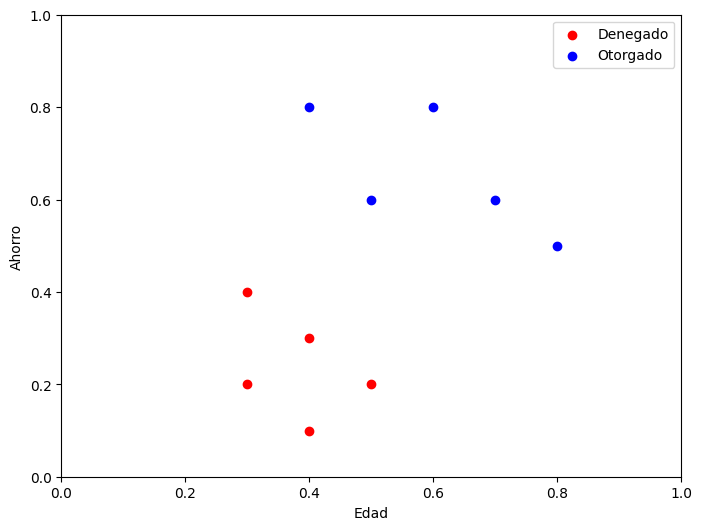

In [96]:
# Ejemplo de uso
f_visualizar_clase(datos)

# Probar el perceptron

Mandar llamar la función *f_activar_perceptron()* para activar el perceptrón con datos aleatorios.

La respuesta a una persona con datos aleatorios es simplemente aleatoria por el momento.

In [97]:
np.random.seed(2024)

In [98]:
vars_ind = 2; # Variables independientes

pesos = np.random.uniform(-1, 1, size=vars_ind)
print (pesos)
# Umbral aleatorio
umbral = np.random.normal(0.5, 0.2, size=1)
print (umbral)

# [Edad, Ahorro]
persona = [0.5, 0.5]

decision, valor = f_activar_perceptron(pesos, persona, umbral)

print ("La decisión es: ", decision, " el valor es: ", valor)


[0.17602904 0.3982175 ]
[0.45969245]
La decisión es:  Aceptado  el valor es:  1


# Entrenar el modelo de datos con el perceptrón

Se define un concepto llamado *epocas* que significa el número de iteracciones para que el perceptrón aprenda y una taza de aprendizaje.

Épocas (epochs): Una época se refiere a una iteración completa sobre todo el conjunto de datos de entrenamiento durante el proceso de aprendizaje. En cada época, el perceptrón ajusta sus pesos y sesgo en función de los errores de predicción en el conjunto de datos. El número de épocas es un hiperparámetro que se establece antes del entrenamiento y controla cuántas veces se repite el proceso de ajuste de pesos y sesgo sobre todo el conjunto de datos. Un número mayor de épocas puede llevar a un mejor ajuste del modelo, pero también puede aumentar el tiempo de entrenamiento y el riesgo de sobreajuste.

Tasa de aprendizaje (learning rate): La tasa de aprendizaje es un hiperparámetro que controla qué tan rápido o qué tan lento se ajustan los pesos del perceptrón durante el entrenamiento. Es un factor multiplicativo que se aplica a la actualización de pesos y sesgo en cada paso de entrenamiento. Una tasa de aprendizaje alta puede hacer que el algoritmo converja más rápidamente, pero también puede hacer que oscile alrededor de la solución óptima. Por otro lado, una tasa de aprendizaje baja puede llevar a una convergencia más lenta, pero puede resultar en una mejor convergencia a una solución óptima.

Entrenar un perceptrón con datos significa ajustar los pesos y el sesgo del perceptrón para que pueda realizar una clasificación binaria adecuada en función de los datos de entrada. El proceso de entrenamiento implica los siguientes pasos:

1. Inicialización de pesos y sesgo: Se inicializan los pesos
$w$ y el sesgo $b$ del perceptrón con valores aleatorios o predeterminados.

2. Iteración sobre los datos de entrenamiento: Se itera sobre cada dato de entrenamiento en el conjunto de datos de entrenamiento.

3. Cálculo de la salida: Para cada dato de entrenamiento, se calcula la salida $z$ del perceptrón como la suma ponderada de las características del dato más el sesgo, seguido de la aplicación de una función de activación para producir la salida final del perceptrón.

4. Cálculo del error: Se calcula el error como la diferencia entre la salida del perceptrón y la clase real del dato de entrenamiento.

5. Actualización de pesos y sesgo: Se actualizan los pesos y el sesgo del perceptrón utilizando la regla de aprendizaje del perceptrón, que implica multiplicar la tasa de aprendizaje por el error y por cada característica del dato de entrenamiento, y luego sumar estos productos a los pesos y al sesgo.

6. Repetición: Los pasos 3 a 5 se repiten para todos los datos de entrenamiento en múltiples épocas hasta que se alcance un criterio de detención, como un número máximo de épocas o un umbral de error.

Aquí un código para enrtenar el perceptrón con los datos de personas:


In [99]:

vars_ind = 2; # Variables independientes
pesos = np.random.uniform(-1, 1, size=vars_ind)
print (pesos)
# Umbral aleatorio
umbral = np.random.normal(0.5, 0.2, size=1)
print (umbral)

taza_de_aprendizaje  = 0.01
epocas = 100

for epoca in range(epocas):
  error_total = 0
  for i in range(len(personas)):
    decision, prediccion = f_activar_perceptron(pesos, personas[i], umbral)
    error = clases[i] - prediccion
    error_total += error ** 2 # elevado al cuadrado
    pesos[0] += taza_de_aprendizaje * personas[i][0] * error
    pesos[1] += taza_de_aprendizaje * personas[i][1] * error
    umbral += taza_de_aprendizaje * error # El nuevo umbral
  print (error_total, end = " ")





[0.45448029 0.35880105]
[0.46981761]
5 5 5 5 5 5 5 5 5 5 5 5 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

# Probar el modelo entrenado




In [100]:
print ("umbral ", umbral)
# [Edad, Ahorro]
persona = [0.5, 0.5]

decision, valor = f_activar_perceptron(pesos, persona, umbral)
print ("Para un apersona de edad y ahorro: [0.5, 0.5]: edad 50 y ahorro 50 mil USD")
print ("La decisión es: ", decision, " el valor es: ", valor)



umbral  [-0.16018239]
Para un apersona de edad y ahorro: [0.5, 0.5]: edad 50 y ahorro 50 mil USD
La decisión es:  Aceptado  el valor es:  1


# Utilizando la librería Scikit-learn

In [101]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron().fit(personas, clases)

# Dos personas a predecir
persona = np.array([[0.2, 0.2],
                     [0.8, 0.8]])

prediccion = perceptron.predict(persona)
print ("Prediccion")
print (prediccion)



Prediccion
[0 1]


# Interpretación

Este caso describe el algoritmo de un perceptrón como concepto inicial del paradigma del aprendiaje profundo o *deep learnimg*.

El perceptrón es una función que encapsula un algoritmo que permite devolver una decisión binaria que bien pudiera utilizrse para cualquier contexto que requiera clasificar registros de una clase u otra.

El perceptrón puede ser el medio para entrenar datos. Este perceptrón acepta como parte de sus parámetros de entrda los valores de las las variables independientes, los pesos específicos y los umbrales que definen las tolerancias permitidas para tomar decisiones.

Toda vez entrenado el modelo que utiliza un perceptrón este puede emplearse para evaluar y predecir resultados de nuevos datos.

De igual forma como los modelos de clasificación anteriormente descritos en casos aneriroes, se puede utilizar un modelo de un perceptrón con datos de entrenamiento para evaluar datos de validación y con las predicciones estimar los aciertos, es decir el estadísticos de *accuracy* o exactitud por medio de una tabla de contingencia y comparar contra otros modelos.


